# CRWA Data Summary
In this notebook, we summarize the data we have on hand from the CRWA's water sample database, `CRWA_Sampling_Database_20191119_LLK.accdb`. The original data is stored in a zip file in the `/data/charles_river_samples_access` folder, but we will be summarizing a version of the data that has been exported to csv and subsequently processed, located in the `/data/charles_river_samples_interim` folder.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import os
import datetime
import sys

In [2]:
for file in os.listdir("../data/charles_river_samples_interim/"):
    print(file)

results_merged.csv
results_merged_cleaned.csv
simple_db_merge.py


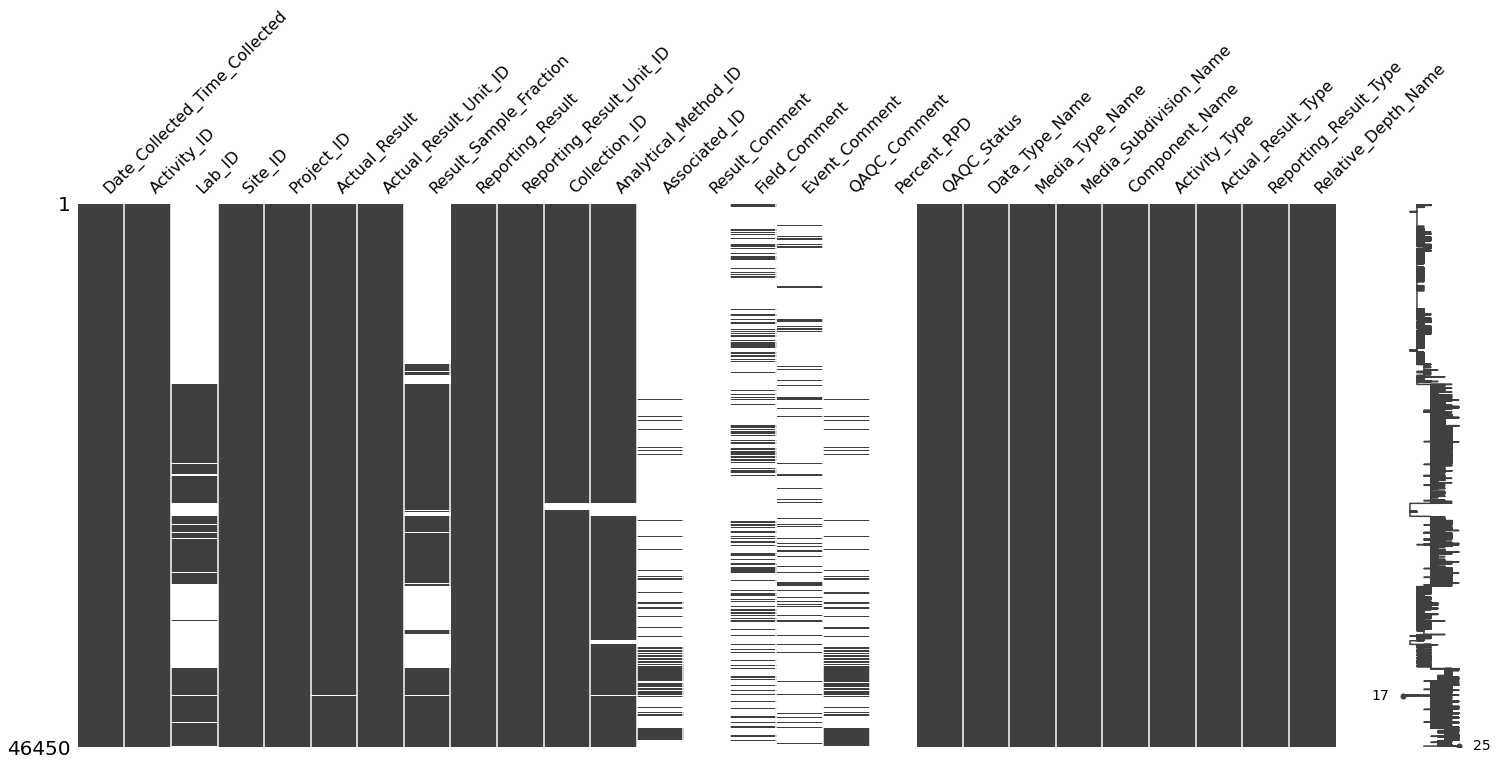

In [27]:
results = pd.read_csv("../data/charles_river_samples_interim/results_merged_cleaned.csv", parse_dates=["Date_Collected_Time_Collected"])
msno.matrix(results)

In [28]:
with pd.option_context("display.max_columns", None):
    display(results)

,Date_Collected_Time_Collected,Activity_ID,Lab_ID,Site_ID,Project_ID,Actual_Result,Actual_Result_Unit_ID,Result_Sample_Fraction,Reporting_Result,Reporting_Result_Unit_ID,Collection_ID,Analytical_Method_ID,Associated_ID,Result_Comment,Field_Comment,Event_Comment,QAQC_Comment,Percent_RPD,QAQC_Status,Data_Type_Name,Media_Type_Name,Media_Subdivision_Name,Component_Name,Activity_Type,Actual_Result_Type,Reporting_Result_Type,Relative_Depth_Name
0,2016-04-12 05:58:00,720160412ROV1DTH01,NaN,ROV1,7,0.67,5,NaN,0.67,5,N-MGBN,Field-Depth-2012,NaN,NaN,Water very still,NaN,NaN,372.0,Final-Accepted,Non-critical,Water,Surface Water,Depth,Field Msr/Obs,Actual,Actual,Surface
1,2016-05-17 05:58:00,720160517ROV1DTH01,NaN,ROV1,7,0.46,5,NaN,5.50,5,N-MGBN,Field-Depth-2012,NaN,NaN,NaN,NaN,NaN,2.0,Final-Accepted,Non-critical,Water,Surface Water,Depth,Field Msr/Obs,Actual,Actual,Surface
2,2016-07-19 06:45:00,720160719ROV1DTH01,NaN,ROV1,7,0.33,5,NaN,0.33,5,N-MGBN,Field-Depth-2012,NaN,NaN,Water wasn't deep enough to use basket sampler...,NaN,NaN,2.0,Final-Accepted,Non-critical,Water,Surface Water,Depth,Field Msr/Obs,Actual,Actual,Surface
3,2016-07-19 07:00:00,720160719ROV2DTH01,NaN,ROV2,7,0.5,5,NaN,0.50,5,N-MGBN,Field-Depth-2012,NaN,NaN,Water was stagnant in wide area after narrow r...,NaN,NaN,4.0,Final-Accepted,Non-critical,Water,Surface Water,Depth,Field Msr/Obs,Actual,Actual,Surface
4,2016-08-16 07:17:00,720160816ROV1DTH01,NaN,ROV1,7,0.33,5,NaN,0.33,5,N-MGBN,Field-Depth-2012,NaN,NaN,Water very low,NaN,NaN,6.0,Final-Accepted,Non-critical,Water,Surface Water,Depth,Field Msr/Obs,Actual,Actual,Surface
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46445,2008-08-11 09:46:39,FLG200808113BUTemp03,NaN,3BU,3,20.36,4,Total,20.36,4,C-MGBO,Therm-Temp-2012,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,Critical,Water,Surface Water,"Temperature, water",Field Msr/Obs,Actual,Actual,Bottom
46446,2008-08-11 09:15:20,FLG200808114LONGTemp02,NaN,4LONG,3,21.33,4,Total,21.33,4,C-MGBO,Therm-Temp-2012,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,Critical,Water,Surface Water,"Temperature, water",Field Msr/Obs,Actual,Actual,Bottom
46447,2008-08-11 09:15:31,FLG200808114LONGTemp03,NaN,4LONG,3,21.33,4,Total,21.33,4,C-MGBO,Therm-Temp-2012,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,Critical,Water,Surface Water,"Temperature, water",Field Msr/Obs,Actual,Actual,Bottom
46448,2008-08-11 09:21:29,FLG200808114LONGTemp05,NaN,4LONG,3,21.31,4,Total,21.31,4,C-MGBO,Therm-Temp-2012,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,Critical,Water,Surface Water,"Temperature, water",Field Msr/Obs,Actual,Actual,Bottom


In [29]:
results.describe()

,Project_ID,Actual_Result_Unit_ID,Reporting_Result,Reporting_Result_Unit_ID,Result_Comment,Percent_RPD
count,46450.000000,46450.000000,46440.000000,46450.000000,0.0,67.000000
mean,5.679828,6.875371,497.739589,6.443380,NaN,10.761194
std,2.215773,3.830432,6138.796986,3.313003,NaN,45.420623
min,1.000000,-1.000000,-6.000000,1.000000,NaN,1.000000
25%,3.000000,4.000000,2.500000,4.000000,NaN,2.000000
50%,7.000000,5.000000,11.000000,5.000000,NaN,2.000000
75%,7.000000,10.000000,61.475000,10.000000,NaN,5.000000
max,7.000000,16.000000,500000.000000,15.000000,NaN,372.000000


In [30]:
results["Date_Collected_Time_Collected"].isna().sum()

0

In [31]:
results.set_index("Date_Collected_Time_Collected", inplace=True)
results.sort_index(inplace=True, ascending=False)

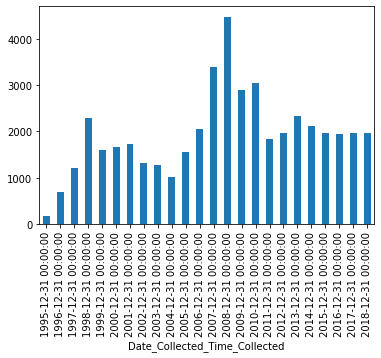

In [32]:
results.resample("Y").count()["Activity_ID"].plot(kind="bar")

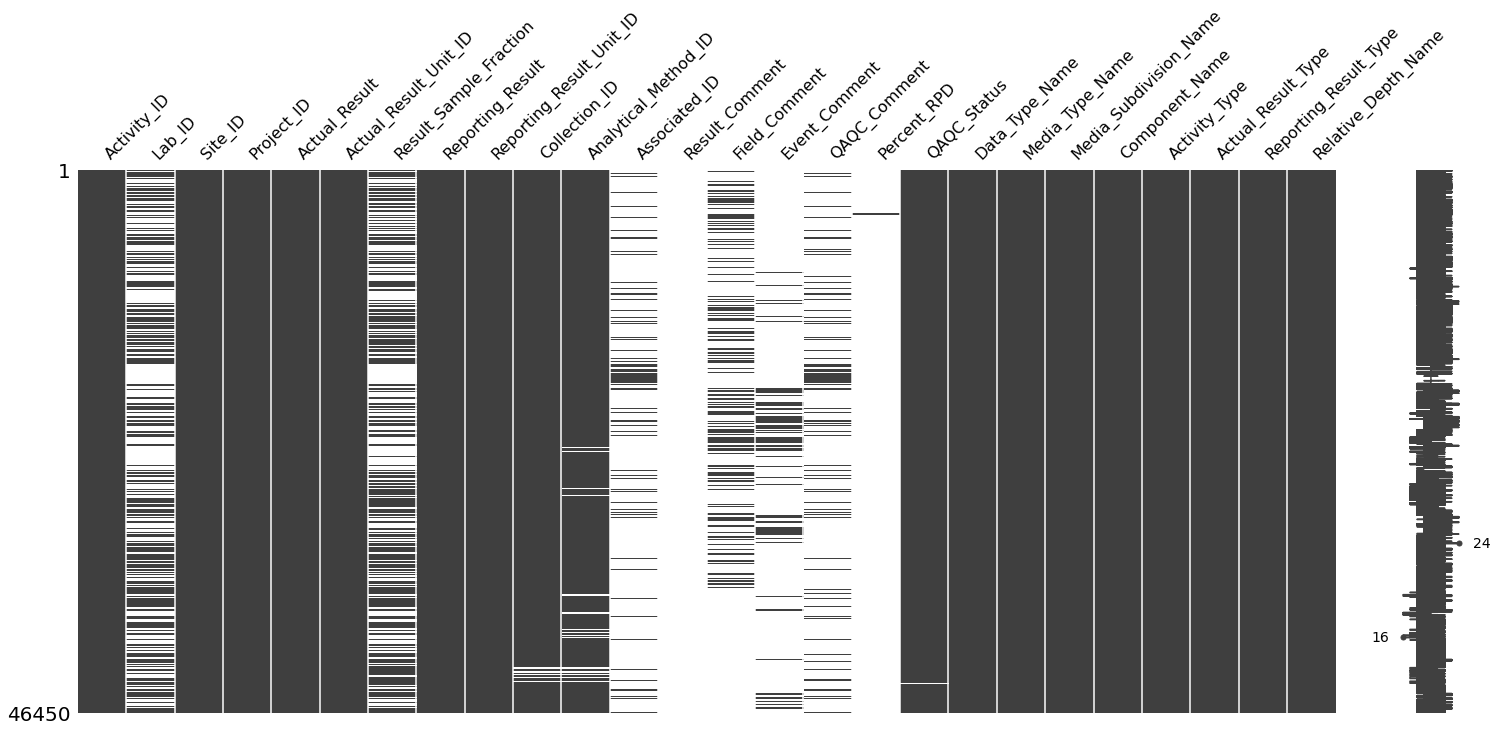

In [33]:
msno.matrix(results)

In [22]:
results.sort_index()

,Activity_ID,Lab_ID,Site_ID,Project_ID,Actual_Result,Actual_Result_Unit_ID,Result_Sample_Fraction,Reporting_Result,Reporting_Result_Unit_ID,Collection_ID,...,Percent_RPD,QAQC_Status,Data_Type_Name,Media_Type_Name,Media_Subdivision_Name,Component_Name,Activity_Type,Actual_Result_Type,Reporting_Result_Type,Relative_Depth_Name
Date_Collected_Time_Collected,,,,,,,,,,,,,,,,,,,,,
1995-06-06 06:00:00,VMM19950606662STemp01,NaN,662S,7,21.75,4,NaN,21.750000,4,N-BUBR,...,NaN,Preliminary,Non-critical,Water,Surface Water,"Temperature, water",Field Msr/Obs,Actual,Actual,Surface
1995-06-06 06:00:00,VMM19950606648STemp01,NaN,648S,7,22.8,4,NaN,22.800000,4,N-MGBO,...,NaN,Preliminary,Non-critical,Water,Surface Water,"Temperature, water",Field Msr/Obs,Actual,Actual,Surface
1995-06-06 06:00:00,VMM19950606621STemp01,NaN,621S,7,22.6,4,NaN,22.600000,4,N-BUBR,...,NaN,Preliminary,Non-critical,Water,Surface Water,"Temperature, water",Field Msr/Obs,Actual,Actual,Surface
1995-06-06 06:00:00,VMM19950606567STemp01,NaN,567S,7,22.3,4,NaN,22.300000,4,N-BUBR,...,NaN,Preliminary,Non-critical,Water,Surface Water,"Temperature, water",Field Msr/Obs,Actual,Actual,Surface
1995-06-06 06:00:00,VMM19950606534STemp01,NaN,534S,7,23,4,NaN,23.000000,4,N-BUBR,...,NaN,Preliminary,Non-critical,Water,Surface Water,"Temperature, water",Field Msr/Obs,Actual,Actual,Surface
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-11 06:20:00,VMM20181211012STN01,3957738,012S,7,1.003936,7,Total,1.003936,7,C-BABR,...,NaN,Final/Accepted,Critical,Water,Surface Water,Nitrogen,Sample-Routine,Actual,Actual,Surface
2018-12-11 06:20:00,VMM20181211012SCA01,3957739,012S,7,0.52,13,Total,0.520000,13,C-BABR,...,NaN,Final/Accepted,Critical,Water,Surface Water,Chlorophyll a,Sample-Routine,Actual,Actual,Surface
2018-12-11 06:20:00,VMM20181211012STP01,3957738,012S,7,0.02512,7,Total,0.025120,7,C-BABR,...,NaN,Final/Accepted,Critical,Water,Surface Water,Phosphorus,Sample-Routine,Actual,Actual,Surface
